<a href="https://colab.research.google.com/github/sathakshi03/Sathakshi-FMML_2023/blob/main/FMML_Module4_Lab1_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.



In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [2]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [3]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [4]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

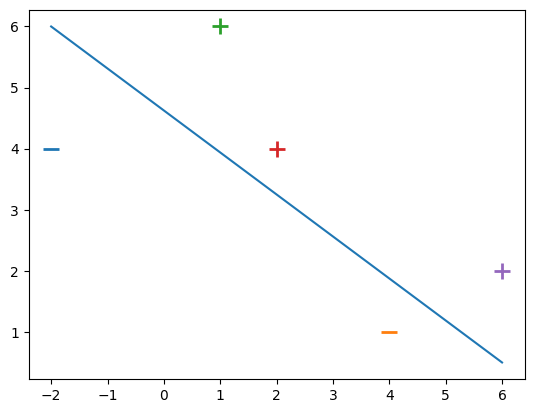

In [5]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

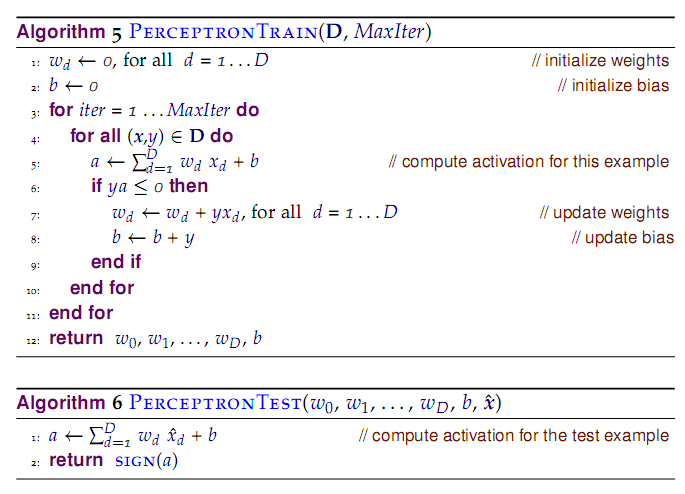

The algorithm is shown in the above image.

In [6]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [7]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

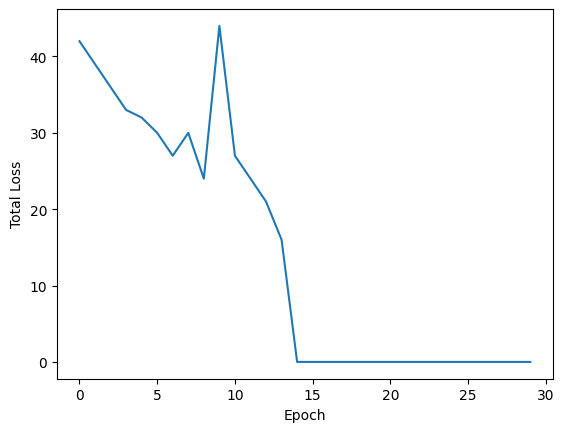

In [8]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

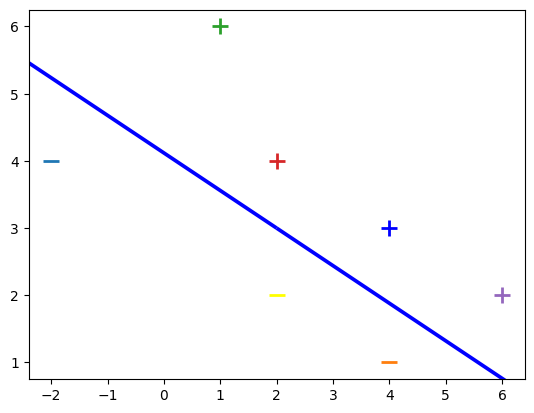

In [9]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



In [10]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [11]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


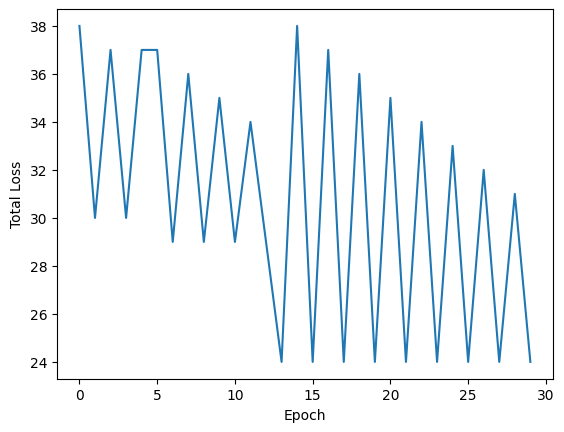

In [12]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

We consider diabetes [dataset](https://iiitaphyd-my.sharepoint.com/:x:/r/personal/cecilia_antony_research_iiit_ac_in/_layouts/15/Doc.aspx?sourcedoc=%7B60D95727-BA12-46A0-903D-78024183E716%7D&file=preprocessed_diabetes_data.csv&action=default&mobileredirect=true) provided for Project 3 for this exercise.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving preprocessed_diabetes_data.csv to preprocessed_diabetes_data.csv


In [ ]:
import pandas as pd

In [ ]:
diabetes_data = pd.read_csv('preprocessed_diabetes_data.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


Since it is a smaller model we are taking only 5 datapoints from above dataset. For `y` we need to convert `0` to `-1` else the model will show zero error for all values (Won't learn anything.  

In [ ]:
X = diabetes_data.drop(["Outcome"], axis=1)[:5].to_numpy()
# Covert 0s to -1
y = diabetes_data["Outcome"][:5].apply(lambda x: 1 if x == 1 else -1)
y = y.to_numpy()
# print(X, y)

[ 164.9          47.08322412 -114.97489768  -36.2           8.
   12.83          6.2315       24.1       ]


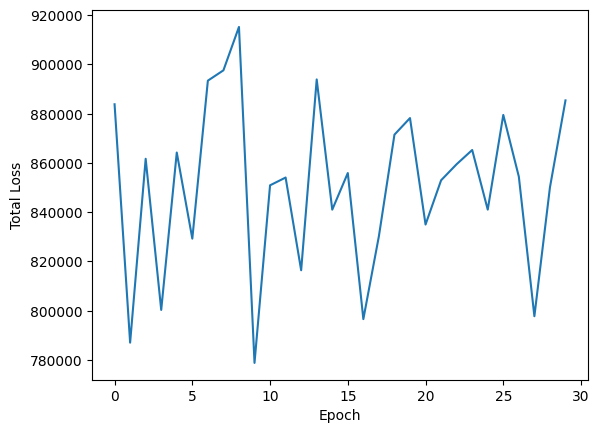

In [ ]:
print(perceptron_algo_plot(X, y, eta=0.1, epoch=30))

It seems data is overfitting and easily converged



#### 2.Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?

Learning Rate 1000
[ 1649000.           470832.24115334 -1149748.97680764  -362000.
    80000.           128300.            62315.           241000.        ]


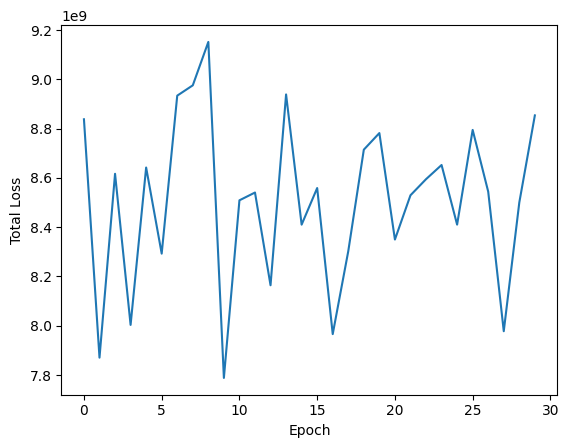

Learning Rate 100
[ 164900.           47083.22411533 -114974.89768076  -36200.
    8000.           12830.            6231.5          24100.        ]


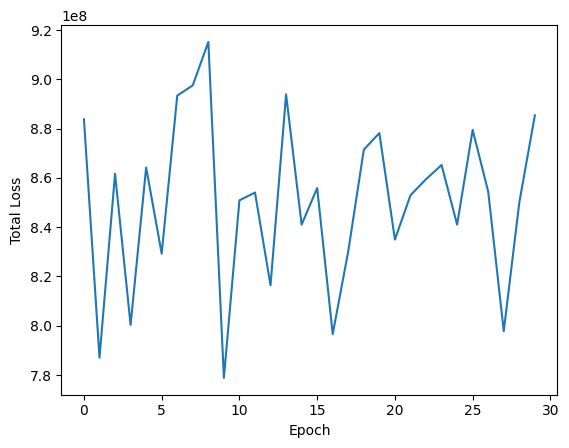

Learning Rate 10
[ 16490.           4708.32241153 -11497.48976808  -3620.
    800.           1283.            623.15         2410.        ]


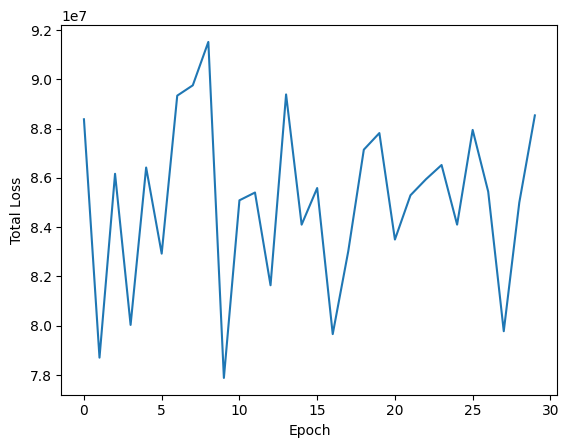

Learning Rate 1
[ 1649.           470.83224115 -1149.74897681  -362.
    80.           128.3           62.315        241.        ]


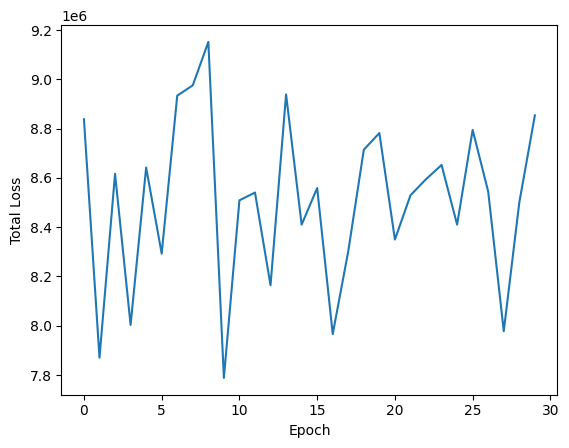

Learning Rate 0.1
[ 164.9          47.08322412 -114.97489768  -36.2           8.
   12.83          6.2315       24.1       ]


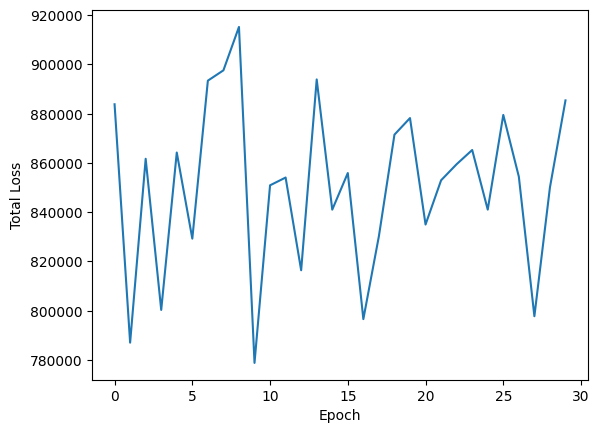

Learning Rate 0.01
[ 16.49         4.70832241 -11.49748977  -3.62         0.8
   1.283        0.62315      2.41      ]


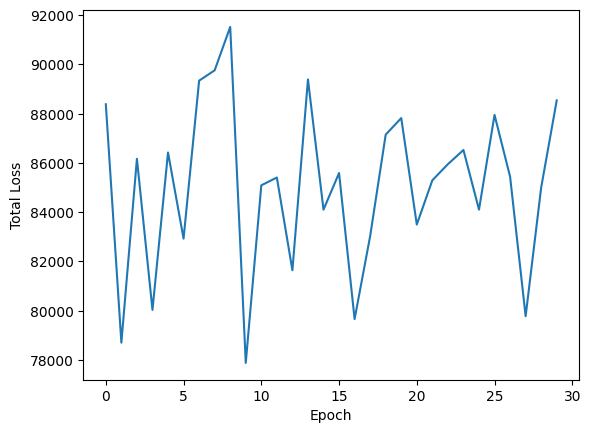

Learning Rate 0.001
[ 1.649       0.47083224 -1.14974898 -0.362       0.08        0.1283
  0.062315    0.241     ]


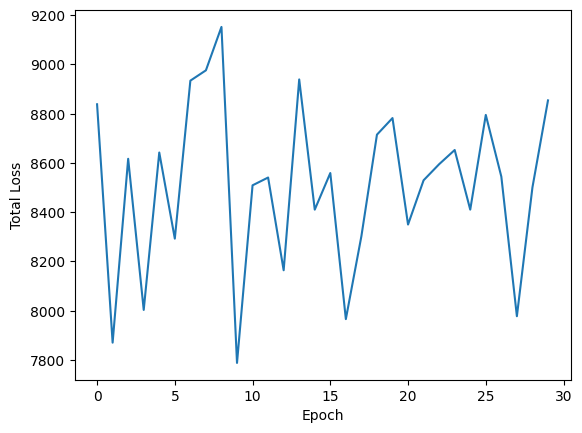

In [ ]:
lr_rates = [1000, 100, 10, 1, 0.1, 0.01, 0.001]
for lr in lr_rates:
  print(f"Learning Rate {lr}")
  print(perceptron_algo_plot(X, y, eta=lr, epoch=30))
  plt.show()

It seems that the model converge on all the possible rages of learning rates for given dataset

#### 3.Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.

We take the previous dataset, but here we add more data samples. Which the model won't be able to learn and hence won't converge

In [ ]:
X = diabetes_data.drop(["Outcome"], axis=1).to_numpy()
# Covert 0s to -1
y = diabetes_data["Outcome"].apply(lambda x: 1 if x == 1 else -1)
y = y.to_numpy()

Learning Rate 1000
[ 1649000.           470832.24115334 -1149748.97680764  -362000.
    80000.           128300.            62315.           241000.        ]


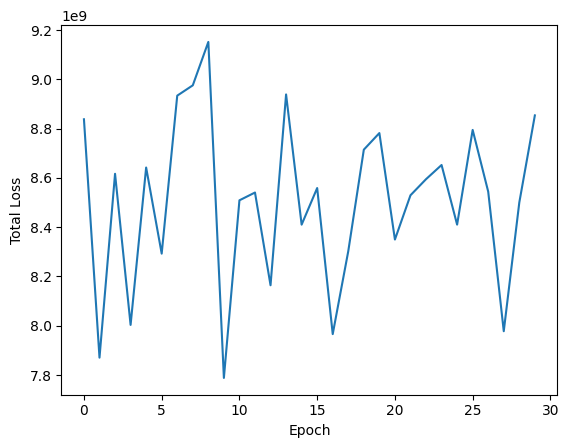

Learning Rate 100
[ 164900.           47083.22411533 -114974.89768076  -36200.
    8000.           12830.            6231.5          24100.        ]


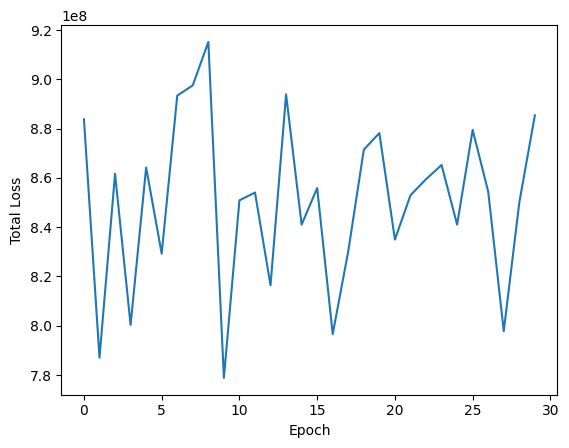

Learning Rate 10
[ 16490.           4708.32241153 -11497.48976808  -3620.
    800.           1283.            623.15         2410.        ]


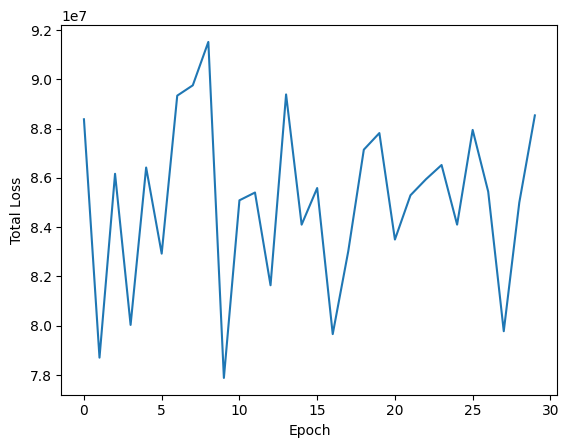

Learning Rate 1
[ 1649.           470.83224115 -1149.74897681  -362.
    80.           128.3           62.315        241.        ]


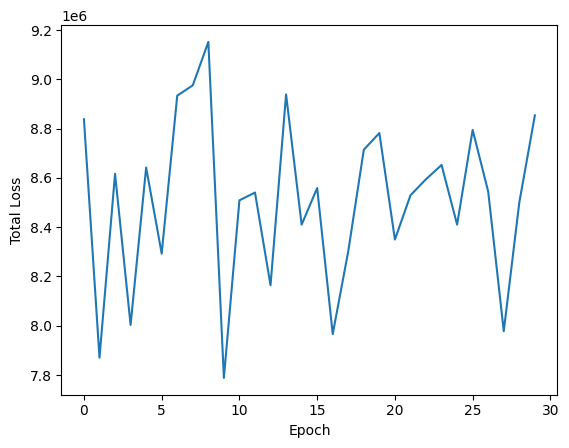

Learning Rate 0.1
[ 164.9          47.08322412 -114.97489768  -36.2           8.
   12.83          6.2315       24.1       ]


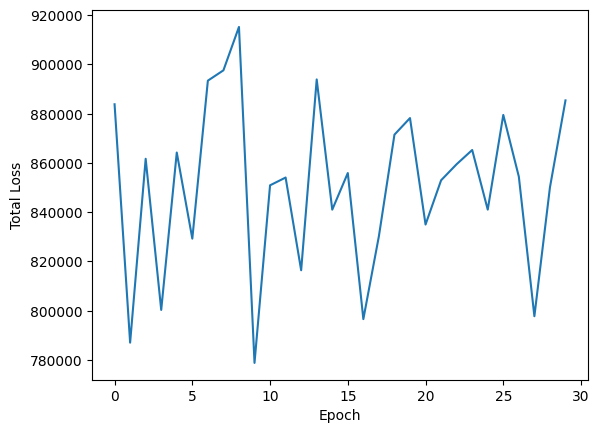

Learning Rate 0.01
[ 16.49         4.70832241 -11.49748977  -3.62         0.8
   1.283        0.62315      2.41      ]


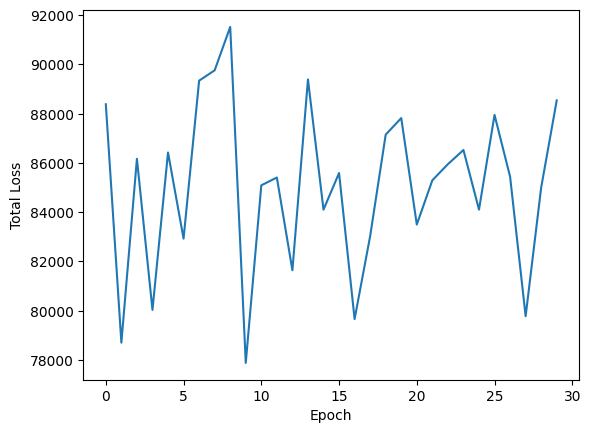

Learning Rate 0.001
[ 1.649       0.47083224 -1.14974898 -0.362       0.08        0.1283
  0.062315    0.241     ]


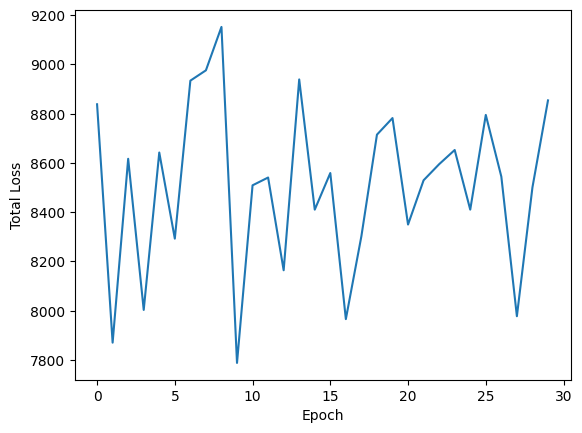

In [ ]:
lr_rates = [1000, 100, 10, 1, 0.1, 0.01, 0.001]
for lr in lr_rates:
  print(f"Learning Rate {lr}")
  print(perceptron_algo_plot(X, y, eta=lr, epoch=30))
  plt.show()